<a href="https://colab.research.google.com/github/rickylukman/Machine-Learning/blob/master/Census_Income_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baca File

In [30]:
# Upload File
from google.colab import files
data_to_load = files.upload()

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [32]:
# Read file dan pemberian nama atribut
df = pd.read_csv("adult.data", 
                  sep=',', 
                  names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","dunno"])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,dunno
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
# Menghapus kolom yang tidak diperlukan
df = df.drop(["fnlwgt","education-num","marital-status","relationship","race","dunno"], axis = 1)

In [34]:
#Cek duplikat data
duplicate = df[df.duplicated()]
duplicate 

,age,workclass,education,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country
315,24,Private,Some-college,Machine-op-inspct,Male,0,0,40,United-States
352,33,Private,Bachelors,Exec-managerial,Male,0,0,40,United-States
376,33,Private,HS-grad,Craft-repair,Female,0,0,40,United-States
391,27,Private,Bachelors,Craft-repair,Male,0,0,50,United-States
435,33,Private,Masters,Prof-specialty,Male,0,0,50,United-States
...,...,...,...,...,...,...,...,...,...
32540,45,State-gov,HS-grad,Adm-clerical,Female,0,0,40,United-States
32549,43,State-gov,Some-college,Adm-clerical,Female,0,0,40,United-States
32557,40,Private,HS-grad,Machine-op-inspct,Male,0,0,40,United-States
32558,58,Private,HS-grad,Adm-clerical,Female,0,0,40,United-States


# Missing Value

In [35]:
# Ubah ? menjadi NaN agar dapat dihitung sebagai missing value
df.replace({' ?': np.nan}, inplace=True)

In [36]:
# Cek missing value pada data
print(df.isnull().sum())

age                  0
workclass         1836
education            0
occupation        1843
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64


In [37]:
df.dtypes

age                int64
workclass         object
education         object
occupation        object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

## Handling missing value untuk type object

In [38]:
print(len(df['workclass'].unique()))
df.workclass.value_counts()
# Handling missing value dengan mengisi dengan data terbanyak
df["workclass"].fillna("Private", inplace = True)

9


In [39]:
print(len(df['occupation'].unique()))
df.occupation.value_counts()
# Handling missing value dengan mengisi dengan data terbanyak
df["occupation"].fillna("Prof-specialty", inplace = True)

15


In [40]:
print(len(df['native-country'].unique()))
df["native-country"].value_counts()
# Handling missing value dengan mengisi dengan data terbanyak
df["native-country"].fillna("United-States", inplace = True)

42


In [41]:
print(df.isnull().sum())

age               0
workclass         0
education         0
occupation        0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64


# Encode object to int/float

In [42]:
df.dtypes

age                int64
workclass         object
education         object
occupation        object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [43]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [44]:
df['workclass'] = encoder.fit_transform(df['workclass'])
df['education'] = encoder.fit_transform(df['education'])
df['occupation'] = encoder.fit_transform(df['occupation'])
df['sex'] = encoder.fit_transform(df['sex'])
df['native-country'] = encoder.fit_transform(df['native-country'])

In [45]:
df.dtypes

age               int64
workclass         int64
education         int64
occupation        int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
dtype: object

In [46]:
df.head()

,age,workclass,education,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,9,0,1,2174,0,40,38
1,50,5,9,3,1,0,0,13,38
2,38,3,11,5,1,0,0,40,38
3,53,3,1,5,1,0,0,40,38
4,28,3,9,9,0,0,0,40,4


# Outlier Detection

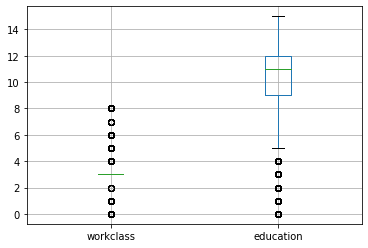

In [21]:
boxplot = df.boxplot(column=['workclass', 'education'])

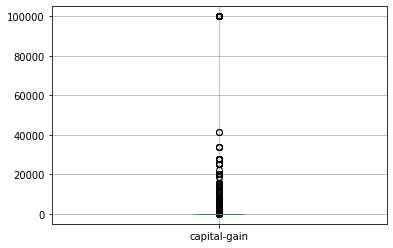

In [25]:
boxplot = df.boxplot(column=['capital-gain'])
# ,'occupation','sex','capital-gain','capital-loss','hours-per-week','native-country'

# Korelasi

In [ ]:
#  Normalisasi
# from sklearn.preprocessing import Normalizer
# norm = Normalizer()
# df = pd.DataFrame(norm.fit_transform(df))
# df.columns = ['age', 'workclass', 'education','occupation','sex','capital-gain','capital-loss','hours-per-week','native-country']

In [47]:
sns.set_style("whitegrid")

<function matplotlib.pyplot.yticks>

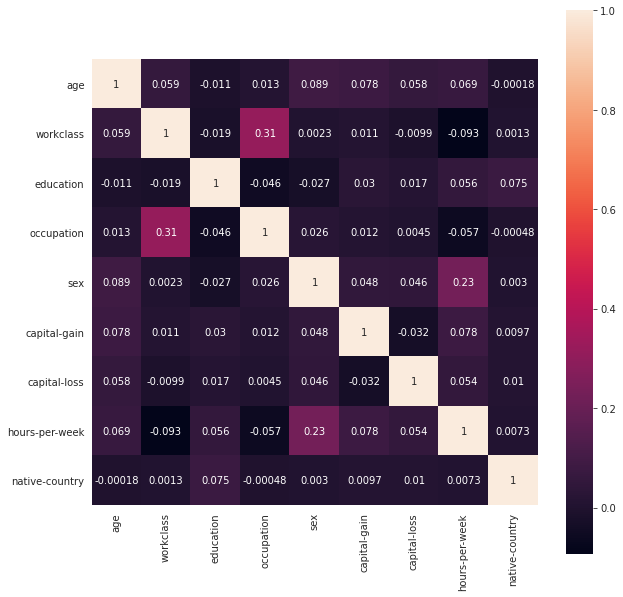

In [48]:
ambil = df.select_dtypes(include = ['float64', 'int64',]).iloc[:, :].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(ambil, vmax=1, square=True,annot=True)
plt.xticks
plt.yticks

# Clasification

## Pemodelan

### Pelabelan

In [49]:
df.head()

,age,workclass,education,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,9,0,1,2174,0,40,38
1,50,5,9,3,1,0,0,13,38
2,38,3,11,5,1,0,0,40,38
3,53,3,1,5,1,0,0,40,38
4,28,3,9,9,0,0,0,40,4


In [50]:
# print(len(df['education'].unique()))
df["capital-loss"].value_counts()
# df.head()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital-loss, Length: 92, dtype: int64

In [51]:
# Menjadikan marital-status sebagai label
label = df['capital-gain'].copy()
df2 = df[['age','workclass','education','occupation','hours-per-week']]

### Split menjadi train dan test

In [52]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df2, label, test_size = 0.3, random_state = 100)

### Training

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(xTrain,yTrain)
yPredict = classifier.predict(xTest)

Evaluasi

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(yTest, yPredict))
print(classification_report(yTest, yPredict))

[[8395    0   11 ...    1    0   33]
 [   3    0    0 ...    0    0    0]
 [  11    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [  37    0    0 ...    0    0    2]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8937
         114       0.00      0.00      0.00         3
         594       0.00      0.00      0.00        11
         914       0.00      0.00      0.00         2
         991       0.00      0.00      0.00         1
        1055       0.00      0.00      0.00         7
        1086       0.00      0.00      0.00         1
        1111       0.00      0.00      0.00         1
        1151       0.00      0.00      0.00         3
        1173       0.00      0.00      0.00         1
        1409       0.00      0.00      0.00         3
        1424       0.00      0.00      0.00         1
        1455       0.00      0.00      0.00         1
        1471   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
from sklearn import metrics
print("Akurasi ",metrics.accuracy_score(yTest,yPredict))

Akurasi  0.8601699252738254
